In [1]:
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [42]:
sampledata = pd.read_csv("D:\\SEM1\\instacart\\sample_data.csv")
sampledata = sampledata.drop(["Unnamed: 0"], axis=1)
sampledata.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,1.014580e+07,1.014580e+07,1.014580e+07,1.014580e+07,1.014580e+07,1.014580e+07,1.014580e+07,1.014580e+07,9.521459e+06
mean,1.710713e+06,2.557124e+04,8.367060e+00,5.901667e-01,1.029447e+05,1.714639e+01,2.737382e+00,1.343180e+01,1.136491e+01
std,9.872660e+05,1.409912e+04,7.139845e+00,4.918028e-01,5.946754e+04,1.750456e+01,2.093130e+00,4.245976e+00,8.939949e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.560030e+05,1.351700e+04,3.000000e+00,0.000000e+00,5.143700e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.711189e+06,2.524500e+04,6.000000e+00,1.000000e+00,1.026270e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565308e+06,3.792300e+04,1.100000e+01,1.000000e+00,1.544110e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.430000e+02,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [43]:
sampledata.shape

(10145797, 10)

In [44]:
missing = sampledata.isnull().sum()
miss = missing.sum()
print(missing)
miss

order_id                       0
product_id                     0
add_to_cart_order              0
reordered                      0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    624338
dtype: int64


624338

In [45]:
#Fill NAs in days since prior order with the median
median_val = sampledata["days_since_prior_order"].median()
print(median_val)
sampledata['days_since_prior_order'] = sampledata["days_since_prior_order"].fillna(median_val)

8.0


In [46]:
sampledata.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2254736,12427,2,1,1,prior,4,4,7,29.0
1,2550362,12427,9,1,1,prior,10,4,8,30.0
2,2539329,12427,3,0,1,prior,1,2,8,8.0
3,3108588,10258,3,1,1,prior,8,1,14,14.0
4,2550362,38928,4,0,1,prior,10,4,8,30.0


In [47]:
sampledata.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1003D2588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E10094C278>]], dtype=object)

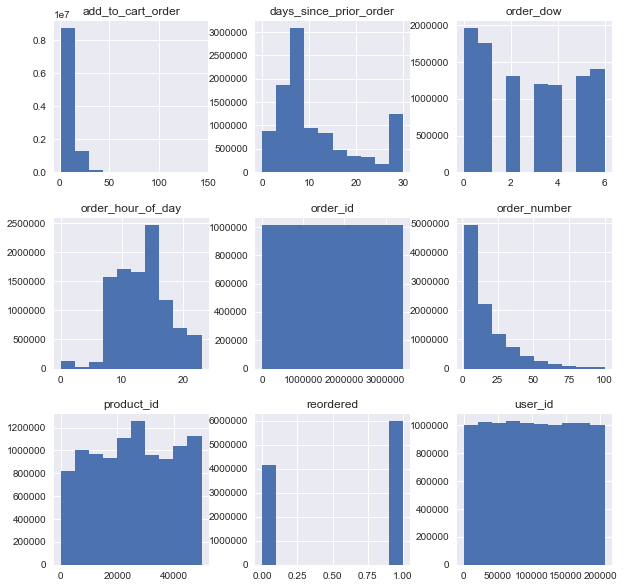

In [48]:
sampledata.hist(figsize=(10,10))

reordered
0    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.215278x0.209722), Axes...
dtype: object

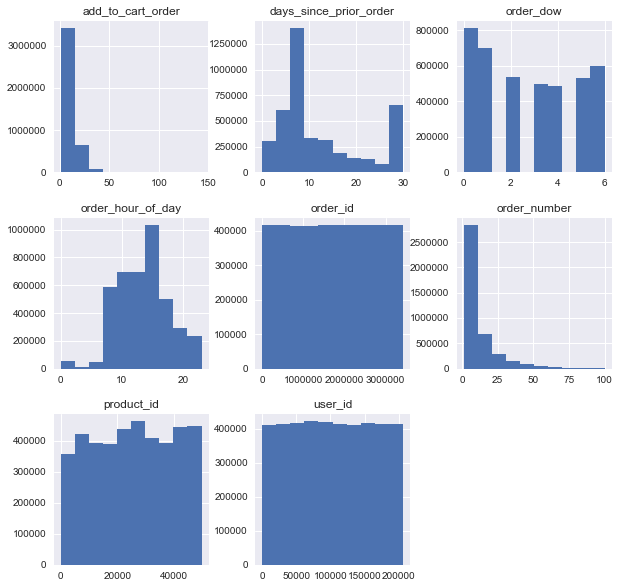

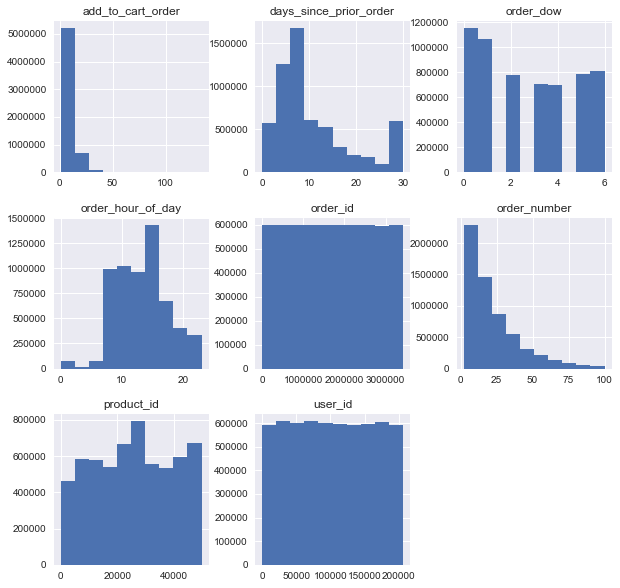

In [49]:
#By reordered
sampledata.groupby('reordered').hist(figsize=(10,10))

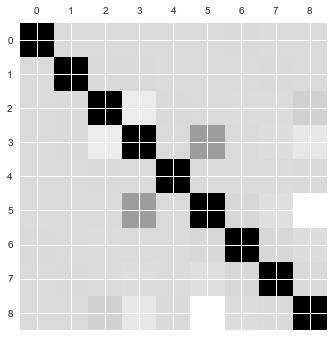

In [50]:
plt.matshow(sampledata.corr())

In [51]:
sample_copy = sampledata.copy(deep=True)

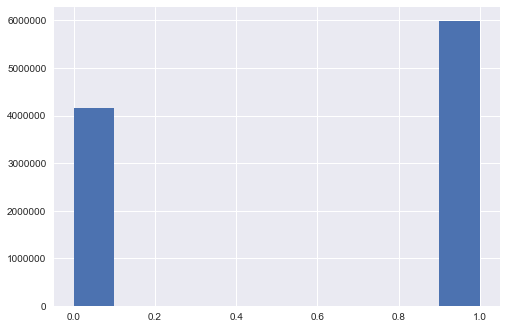

In [93]:
sample_copy['reordered'].hist()

In [52]:
sampledata_target = sampledata.pop("reordered")
print(sampledata_target.shape)
print(sampledata.shape)

(10145797,)
(10145797, 9)


In [53]:
sam_target = sampledata_target.reshape(-1,1)
sam_target.shape

C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


(10145797, 1)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampledata, sam_target,
                                                    stratify=sam_target, 
                                                    test_size=0.30)
print(X_train.shape)
print(X_test.shape)

(7102057, 9)
(3043740, 9)


In [55]:
X_train = X_train.drop(['eval_set'], axis=1)
X_test = X_test.drop(['eval_set'], axis=1)
print(X_train.shape)
print(X_test.shape)

(7102057, 8)
(3043740, 8)


In [ ]:
y_train = y_train

In [57]:
#Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

rfe = RFE(logreg,6)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True  True  True  True False False  True]
[1 1 1 1 1 3 2 1]


In [58]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.610974
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              7102057
Model:                          Logit   Df Residuals:                  7102049
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Apr 2018   Pseudo R-squ.:                 0.09726
Time:                        13:24:24   Log-Likelihood:            -4.3392e+06
converged:                       True   LL-Null:                   -4.8067e+06
                                        LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
order_id                 6.77e-10   7.77e-10      0.872      0.383   -8.45e-10     2

# Logistic Regression

In [59]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.5902


In [63]:
#Cross Validation
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

10-fold cross validation average accuracy: 0.590


In [64]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[      0 1247426]
 [      0 1796314]]


In [65]:
#Metric Scores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00   1247426
          1       0.59      1.00      0.74   1796314

avg / total       0.35      0.59      0.44   3043740



C:\Users\Vinay Kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


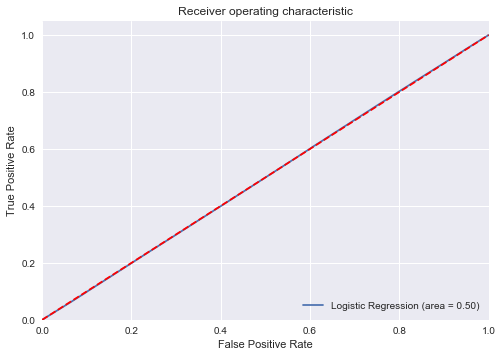

In [66]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [79]:
metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

0.74227023086932509

# Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
y_pred = dtree.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[ 695504,  551922],
       [ 574138, 1222176]], dtype=int64)

In [102]:
metrics.accuracy_score(y_test, y_pred)

0.63004067364492367

In [106]:
def train_using_gini(X_train, X_test, y_train):
 
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
 
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini
     
# Function to perform training with entropy.
def train_using_entropy(X_train, X_test, y_train):
 
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
 
    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy
 
 
# Function to make predictions
def prediction(X_test, clf_object):
 
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    #print("Predicted values:")
    #print(y_pred)
    return y_pred
     
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
     
    print("Confusion Matrix: ",
        metrics.confusion_matrix(y_test, y_pred))
     
    print ("Accuracy : ",
    metrics.accuracy_score(y_test,y_pred)*100)
     
    print("Report : ",
    metrics.classification_report(y_test, y_pred))

In [107]:
def main():
     
    # Building Phase
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)
     
    # Operational Phase
    print("Results Using Gini Index:")
     
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cal_accuracy(y_test, y_pred_gini)
     
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cal_accuracy(y_test, y_pred_entropy)
     
     
# Calling main function
if __name__=="__main__":
    main()


Results Using Gini Index:
Predicted values:
Confusion Matrix:  [[ 531176  716250]
 [ 202174 1594140]]
Accuracy :  69.8258064092
Report :               precision    recall  f1-score   support

          0       0.72      0.43      0.54   1247426
          1       0.69      0.89      0.78   1796314

avg / total       0.70      0.70      0.68   3043740

Results Using Entropy:
Predicted values:
Confusion Matrix:  [[ 531176  716250]
 [ 202174 1594140]]
Accuracy :  69.8258064092
Report :               precision    recall  f1-score   support

          0       0.72      0.43      0.54   1247426
          1       0.69      0.89      0.78   1796314

avg / total       0.70      0.70      0.68   3043740



# Random Forests

In [113]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=100)
rf.set_params( n_jobs = 1 ).fit(X_train,y_train)

MemoryError: 

In [ ]:
rf_pred = rf.predict(X_test)
print(metrics.confusion_matrix(rf_pred,y_test))
print(metrics.accuracy_score(rf_pred,y_test))